# Linearity

How to check:
Use scatter plots to visualize the relationship between 𝑋 and 𝑌.
Plot residuals vs. predicted values. 
If a pattern (e.g., curve) appears, the relationship might not be linear.

In [ ]:
import pandas as pd
df = pd.read_csv("./Datasets/autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [2]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")  # Convert to numeric
df["horsepower"].fillna(df["horsepower"].median(), inplace=True)  # Replace NaN with median


C:\Users\Admin\AppData\Local\Temp\ipykernel_9440\4069625804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["horsepower"].fillna(df["horsepower"].median(), inplace=True)  # Replace NaN with median


In [3]:
df = df[df["price"] != '?']  # Remove rows with '?'
df["price"] = pd.to_numeric(df["price"])  # Convert remaining values to numeric


C:\Users\Admin\AppData\Local\Temp\ipykernel_9440\2873700006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = pd.to_numeric(df["price"])  # Convert remaining values to numeric


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [5]:
df["price"].unique()

array([13495, 16500, 13950, 17450, 15250, 17710, 18920, 23875, 16430,
       16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,  6295,
        6575,  5572,  6377,  7957,  6229,  6692,  7609,  8558,  8921,
       12964,  6479,  6855,  5399,  6529,  7129,  7295,  7895,  9095,
        8845, 10295, 12945, 10345,  6785, 11048, 32250, 35550, 36000,
        5195,  6095,  6795,  6695,  7395, 10945, 11845, 13645, 15645,
        8495, 10595, 10245, 10795, 11245, 18280, 18344, 25552, 28248,
       28176, 31600, 34184, 35056, 40960, 45400, 16503,  5389,  6189,
        6669,  7689,  9959,  8499, 12629, 14869, 14489,  6989,  8189,
        9279,  5499,  7099,  6649,  6849,  7349,  7299,  7799,  7499,
        7999,  8249,  8949,  9549, 13499, 14399, 17199, 19699, 18399,
       11900, 13200, 12440, 13860, 15580, 16900, 16695, 17075, 16630,
       17950, 18150, 12764, 22018, 32528, 34028, 37028,  9295,  9895,
       11850, 12170, 15040, 15510, 18620,  5118,  7053,  7603,  7126,
        7775,  9960,

In [7]:
df["price"].dtypes

dtype('int64')

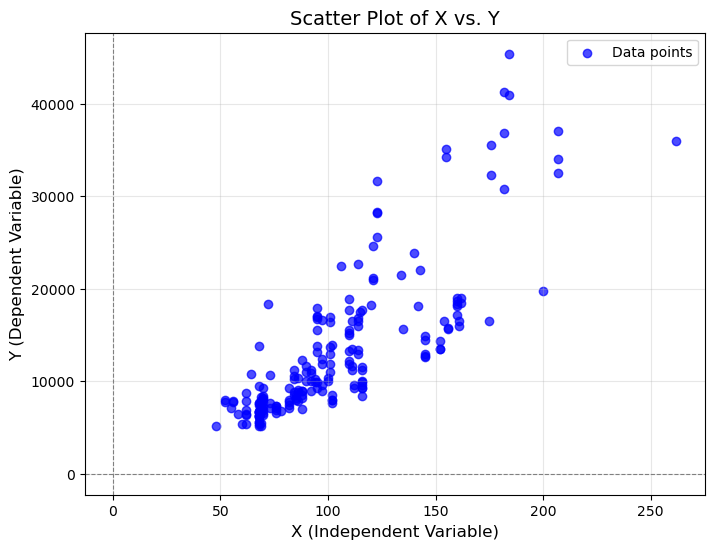

In [8]:
# Scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df["horsepower"],df["price"] , color='blue', alpha=0.7, label="Data points")
plt.title("Scatter Plot of X vs. Y", fontsize=14)
plt.xlabel("X (Independent Variable)", fontsize=12)
plt.ylabel("Y (Dependent Variable)", fontsize=12)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Reference line
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)  # Reference line
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

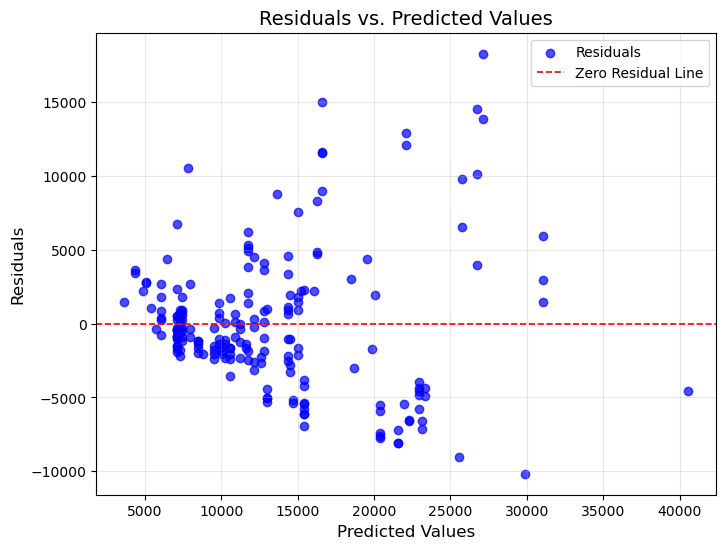

In [9]:
# Linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit((df[["horsepower"]]), df["price"])

# Predictions
Y_pred = model.predict(df[["horsepower"]])

# Residuals
residuals = df["price"] - Y_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, color='blue', alpha=0.7, label="Residuals")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.2, label="Zero Residual Line")
plt.title("Residuals vs. Predicted Values", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Independence of Errors (No Autocorrelation)

Durbin-Watson Statistic: 2.04


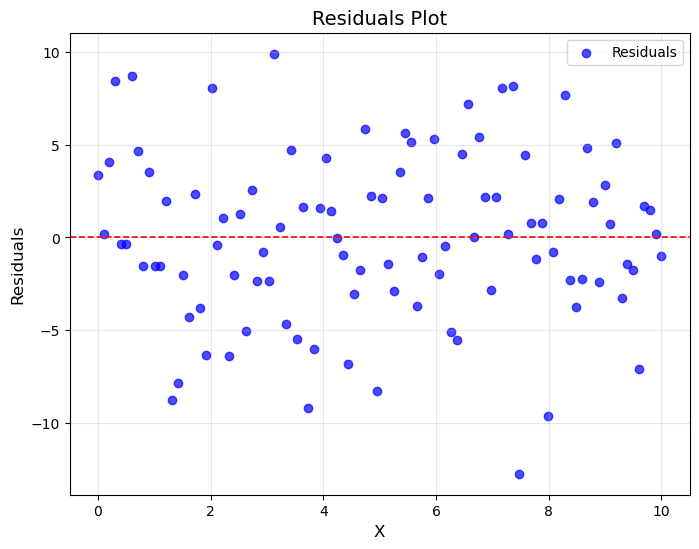

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson

# Sample Data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # Independent variable
Y = 5 * X.flatten() + np.random.normal(scale=5, size=100)  # Dependent variable with noise

# Create DataFrame
df = pd.DataFrame({"X": X.flatten(), "Y": Y})

# Fit Linear Regression
model = LinearRegression()
model.fit(df[["X"]], df["Y"])
Y_pred = model.predict(df[["X"]])

# Residuals
residuals = df["Y"] - Y_pred

# Durbin-Watson Test
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_statistic:.2f}")
# Visualize Residuals
plt.figure(figsize=(8, 6))
plt.scatter(X, residuals, alpha=0.7, color="blue", label="Residuals")
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.2)
plt.title("Residuals Plot", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Homoscedasticity

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2251.
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           2.06e-69
Time:                        23:24:19   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4302      0.341      1.263      0.2

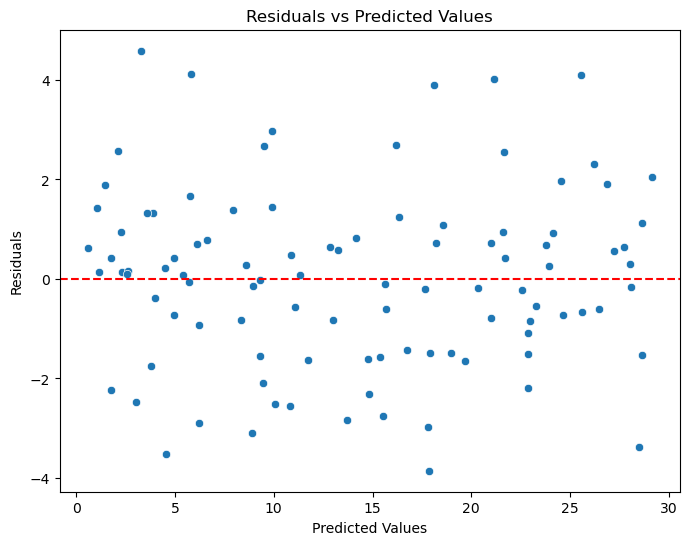

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable
Y = 3 * X + np.random.randn(100, 1) * 2  # Dependent variable with some noise

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print model summary
print(model.summary())
# Get predicted values and residuals
predicted_values = model.predict(X)
residuals = model.resid

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


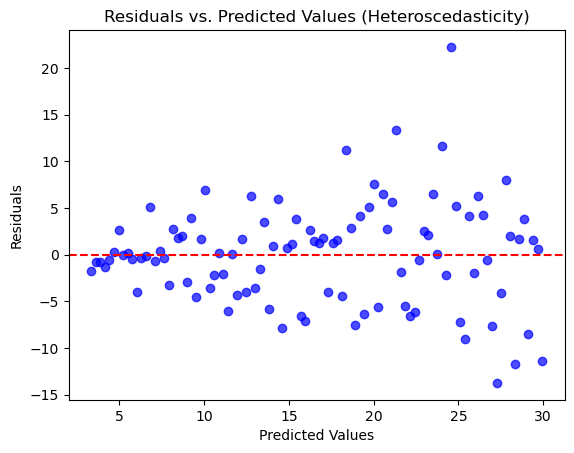

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate example data
np.random.seed(42)
X = np.linspace(1, 10, 100).reshape(-1, 1)  # Independent variable
Y = 3 * X.flatten() + np.random.normal(scale=1, size=100)  # Dependent variable with noise

# Introduce heteroscedasticity by increasing variance as X increases
Y_hetero = 3 * X.flatten() + np.random.normal(scale=X.flatten(), size=100)

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X, Y_hetero)  # Use heteroscedastic data

# Predictions
Y_pred = model.predict(X)

# Residuals
residuals = Y_hetero - Y_pred

# Plot Residuals vs. Predicted Values (for heteroscedasticity)
plt.scatter(Y_pred, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values (Heteroscedasticity)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
# The residuals increase in spread as 𝑋 increases,showing heteroscedasticity.
#This indicates that the variance is not constant across levels of the independent variable x.

In [13]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)

# Print the results
print("Breusch-Pagan Test Results:")
print(f"Lagrange Multiplier Statistic: {bp_test[0]}")
print(f"p-value: {bp_test[1]}")
print(f"F-statistic: {bp_test[2]}")
print(f"F-test p-value: {bp_test[3]}") 
#If the p-value is less than your significance level (e.g., 0.05),
#you reject the null hypothesis and conclude that heteroscedasticity is present.

ValueError: The Breusch-Pagan test requires exog to have at least two columns where one is a constant.

# Normality of residual

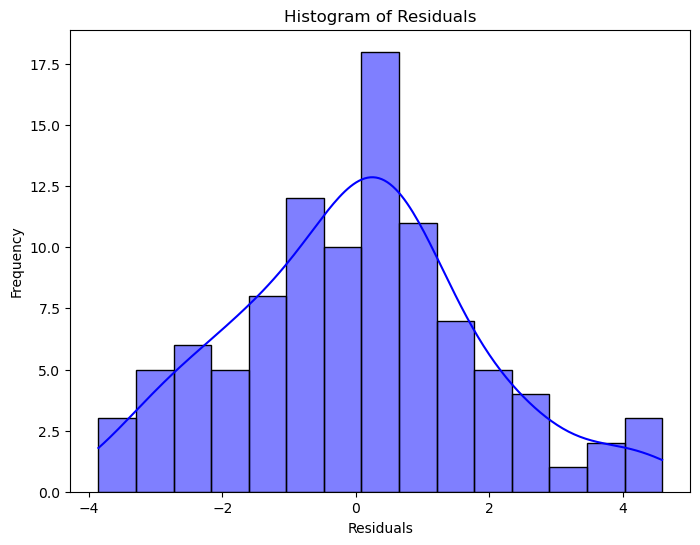

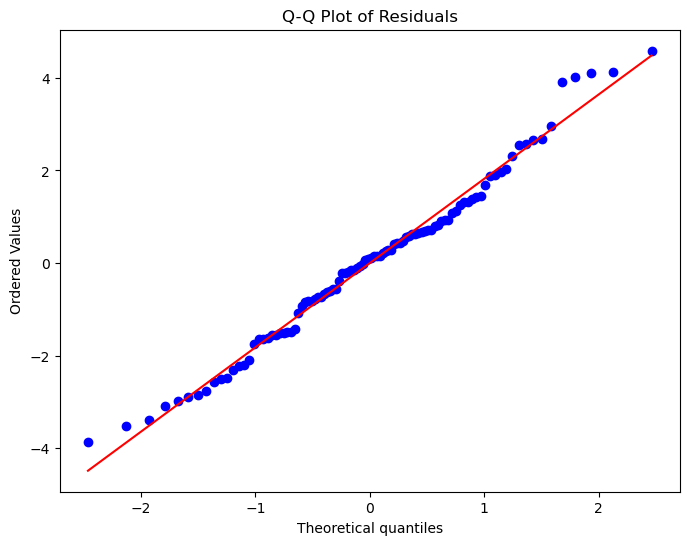

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Example dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable
Y = 3 * X + np.random.randn(100, 1) * 2  # Dependent variable with some noise

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Get residuals
residuals = model.resid

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=15)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()